In [22]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

In [23]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Calc YR Salary             2166 non-null   object
 1   Yearly PERS Contributions  2166 non-null   object
 2   Age                        2166 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.9+ KB


# 1. Get the data ready

In [24]:
#Check data to see how many tuples have a null value
df.isna().sum()

Calc YR Salary               0
Yearly PERS Contributions    0
Age                          0
dtype: int64

In [25]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','', regex=True).replace( '[(]','-',regex=True).astype(float))
cleaned_data

,Age,Calc YR Salary,Yearly PERS Contributions
0,27.0,157849.89,24850.79
1,44.0,157566.28,42901.25
2,44.0,156565.75,43101.70
3,53.0,155744.40,43954.19
4,37.0,155676.31,38996.63
...,...,...,...
2161,18.0,41923.83,10345.45
2162,62.0,41786.44,10591.45
2163,51.0,41579.60,10453.15
2164,59.0,41316.11,10310.02


In [26]:
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

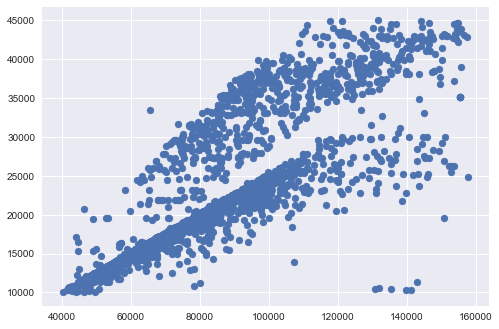

In [27]:
plt.scatter(yr_salary, pers_contributions)

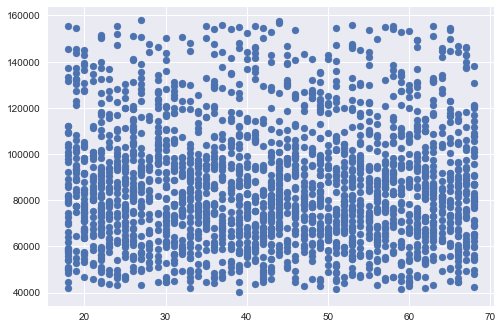

In [29]:
plt.scatter(age, yr_salary)

<AxesSubplot:>

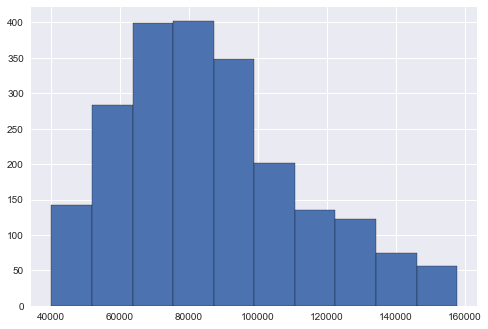

In [30]:
plt.style.use('seaborn')
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')

<AxesSubplot:>

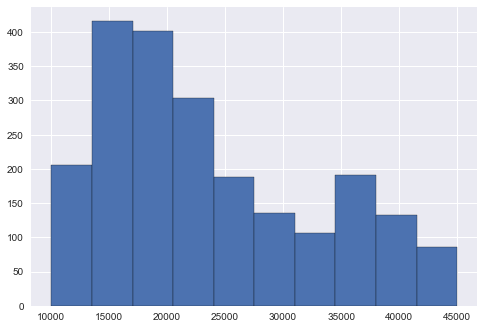

In [31]:
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')

<AxesSubplot:>

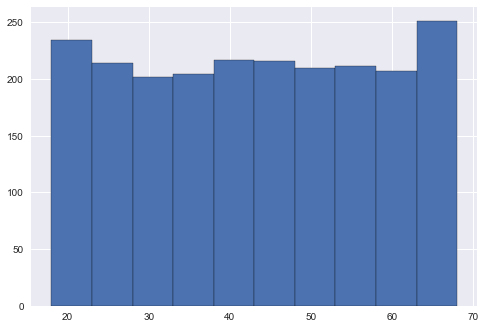

In [32]:
cleaned_data['Age'].hist(edgecolor = 'black')

In [33]:
#Import the TrainTestSplit class and the OneHotEncoder class
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

# 2. Choose the right algorithm

In [34]:
#Import the RandomForestRegressor class
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor()

In [35]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

MLPRegressor()

In [36]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.6621776061198383

# 3. Use trained model to make predictions

In [37]:
#Use 'predict' on just the 'X_test' dataset to see what the model gives
regr.predict(X_test[:5])

array([18583.63636708, 19317.55742349, 22600.38506524, 13692.36305475,
       29397.51936495])

In [38]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_test[:5])

array([17087.84, 17162.99, 17344.43, 15583.23, 25132.71])

In [39]:
#Import accuracy_score class *** doesn't work. Throws an error due to inability for accuracy_score to handle mixed class and continuous numbers
#from sklearn.metrics import accuracy_score

#accuracy_score(y_test, y_preds)
#np.mean(y_preds == y_test)


from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

3979.294844160811